In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_ff = pd.read_csv("forestfires.csv")
df_ff.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df_ff.shape

(517, 31)

In [5]:
df_ff.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [6]:
df_ff.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
duplicate = df_ff[df_ff.duplicated()]
print("Duplicate Rows :")

Duplicate Rows :


In [8]:
df_ff.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [9]:
df_ff=df_ff.loc[:,['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct', 'monthsep', 'size_category']]
df_ff.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [10]:
x = df_ff.iloc[:,0:-1]
x.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
y = df_ff.iloc[:,-1]
y.head()

0    small
1    small
2    small
3    small
4    small
Name: size_category, dtype: object

In [13]:
y.replace(to_replace=['small','large'],value=[0,1],inplace = True)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: size_category, dtype: int64

In [8]:
y=y
y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: int64

<h3> Model Building </h3>

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_dim=28,activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(10,activation='sigmoid'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                435       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 606
Trainable params: 606
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history = model.fit(x,y,validation_split=0.20, epochs=50, batch_size=100)

Epoch 1/50
5/5 [==============================] - 1s 59ms/step - loss: 0.6394 - accuracy: 0.7385 - val_loss: 0.6375 - val_accuracy: 0.7019
Epoch 2/50
5/5 [==============================] - 0s 9ms/step - loss: 0.6267 - accuracy: 0.7385 - val_loss: 0.6319 - val_accuracy: 0.7019
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 0.6159 - accuracy: 0.7385 - val_loss: 0.6271 - val_accuracy: 0.7019
Epoch 4/50
5/5 [==============================] - 0s 9ms/step - loss: 0.6066 - accuracy: 0.7385 - val_loss: 0.6213 - val_accuracy: 0.7019
Epoch 5/50
5/5 [==============================] - 0s 10ms/step - loss: 0.5976 - accuracy: 0.7385 - val_loss: 0.6167 - val_accuracy: 0.7019
Epoch 6/50
5/5 [==============================] - 0s 10ms/step - loss: 0.5884 - accuracy: 0.7385 - val_loss: 0.6121 - val_accuracy: 0.7019
Epoch 7/50
5/5 [==============================] - 0s 10ms/step - loss: 0.5819 - accuracy: 0.7385 - val_loss: 0.6083 - val_accuracy: 0.7019
Epoch 8/50
5/5 [==============

In [20]:
model.save_weights("mywt.kmw")

In [21]:
scores = model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.5463 - accuracy: 0.7311
accuracy: 73.11%


In [34]:
model.history.history.keys()

dict_keys([])

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

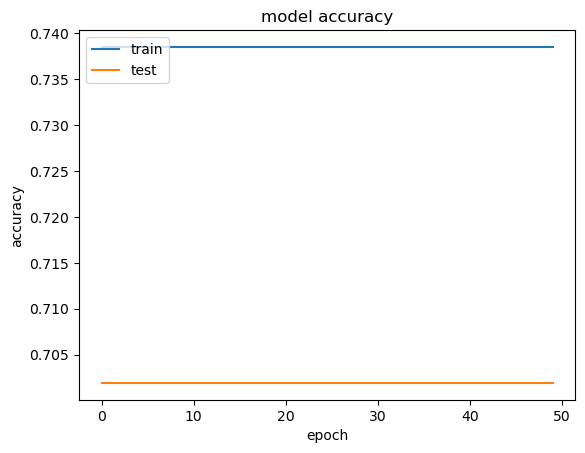

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

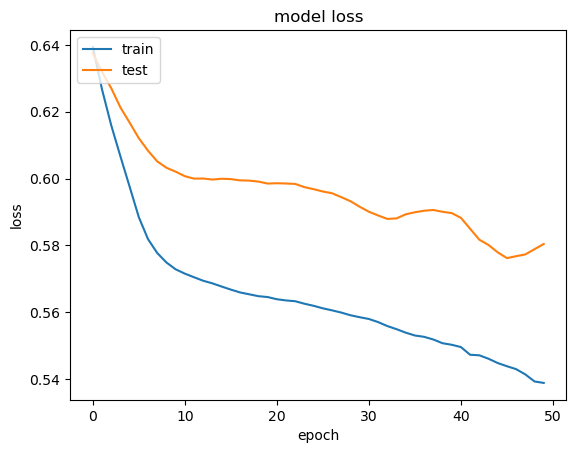

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [26]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_dim=28,activation = 'ReLU'))
model.add(tf.keras.layers.Dense(10,activation='ReLU'))
model.add(tf.keras.layers.Dense(1,activation='ReLU'))

In [27]:
model.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
history = model.fit(x,y,validation_split=0.20, epochs=50, batch_size=100)

Epoch 1/50
5/5 [==============================] - 1s 45ms/step - loss: 11.2615 - accuracy: 0.2615 - val_loss: 10.7038 - val_accuracy: 0.2981
Epoch 2/50
5/5 [==============================] - 0s 10ms/step - loss: 11.2615 - accuracy: 0.2615 - val_loss: 10.7038 - val_accuracy: 0.2981
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 11.2615 - accuracy: 0.2615 - val_loss: 10.7038 - val_accuracy: 0.2981
Epoch 4/50
5/5 [==============================] - 0s 13ms/step - loss: 11.2615 - accuracy: 0.2615 - val_loss: 10.7038 - val_accuracy: 0.2981
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 11.2615 - accuracy: 0.2615 - val_loss: 10.7038 - val_accuracy: 0.2981
Epoch 6/50
5/5 [==============================] - 0s 10ms/step - loss: 11.2615 - accuracy: 0.2615 - val_loss: 10.7038 - val_accuracy: 0.2981
Epoch 7/50
5/5 [==============================] - 0s 9ms/step - loss: 11.2615 - accuracy: 0.2615 - val_loss: 10.7038 - val_accuracy: 0.2981
Epoch 8/50
5/5 [

In [29]:
model.save_weights("mywt.kmw")

In [30]:
scores = model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 11.1493 - accuracy: 0.2689
accuracy: 26.89%


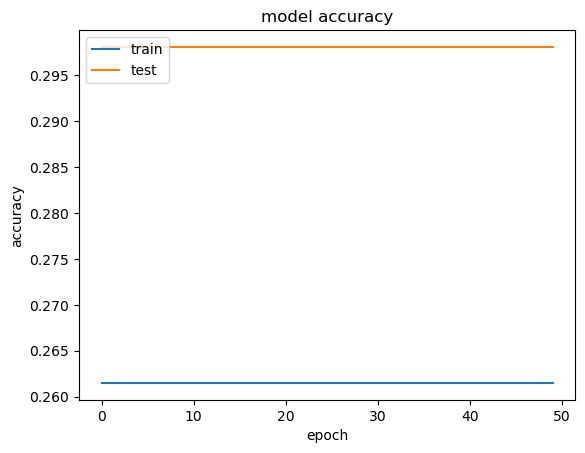

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

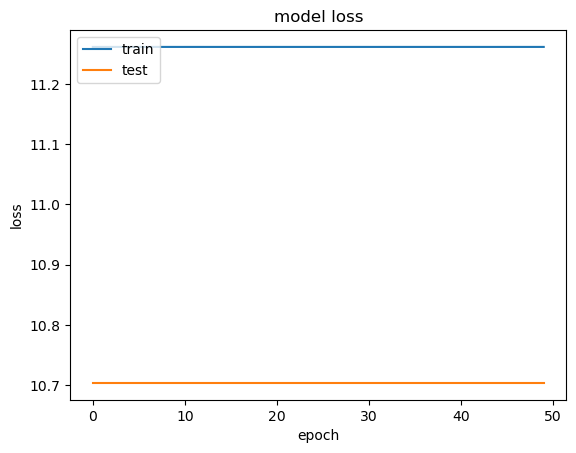

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()